# Part 1, exploratory data analysis (EDA)

Вопросы:

1. [1 балл] Загрузка данных и предобработка - загрузите датасет, посмотрите на его `head` и `tail`. Похоже, у нас есть одна лишняя переменная - Rank, которая дублирует индекс и совершенно не информативна, давайте сразу её уберем. Воспользуйтесь функцией `describe()` для отображения базовых статистик переменных. Для удобства отображения можно транспонировать получившийся датафрейм при помощи `.T`
2. [1 балл] По сколько телефонов у нас есть в каждой из ценовых категорий?
3. [2 балла] При помощи метода `groupby()` посчитайте средние по всем показателям, в зависимости от ценовой категории. Правда ли, что с ростом цены (повышение категории), возрастает запас батареи телефона? Увеличивается число ядер (n_cores)?
4. [2 балла] Сколько в датасете есть телефонов без вайфая, без тачскрина, но при этом из третьей ценовой категории?
5. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
6. [1 балл] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета. Какой показатель сильнее всего положительно скоррелирован с ценовой категорией? 
7. [2 балла] Вопрос-сюрприз! Попробуйте самостоятельно придумать и происследовать какой-нибудь осмысленный вопрос или визуализацию для вашего датасета. Инициатива не наказуема, так что удивите меня ;)

## Итого - 9 баллов, очень хорошо :)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Комментарий к решению
Прекрасно, с загрузкой справились, вот только не стоило первый столбец задавать в качестве индекса - он ведь тоже является переменной (battery_power)

In [127]:
data = pd.read_csv(r'C:\Users\1\Downloads\Nomokonova_Alina_Mobile_Price.csv',encoding='cp1251', index_col = 0)
data.transpose()

battery_power,842,1021,563,615,1821,1859,1821,1954,1445,509,...,1617,1882,674,1467,858,794,1965,1911,1512,510
blue,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2,0.5,1.7,0.5,0.5,0.6,...,2.4,2.0,2.9,0.5,2.2,0.5,2.6,0.9,0.9,2.0
dual_sim,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
fc,1.0,0.0,2.0,0.0,13.0,3.0,4.0,0.0,0.0,2.0,...,8.0,11.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,5.0
four_g,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0,22.0,10.0,24.0,53.0,9.0,...,36.0,44.0,21.0,18.0,50.0,2.0,39.0,36.0,46.0,45.0
m_dep,0.6,0.7,0.9,0.8,0.6,0.7,0.8,0.8,0.7,0.1,...,0.8,0.8,0.2,0.6,0.1,0.8,0.2,0.7,0.1,0.9
mobile_wt,188.0,136.0,145.0,131.0,141.0,164.0,139.0,187.0,174.0,93.0,...,85.0,113.0,198.0,122.0,84.0,106.0,187.0,108.0,145.0,168.0
n_cores,2.0,3.0,5.0,6.0,2.0,1.0,8.0,4.0,7.0,5.0,...,1.0,8.0,3.0,5.0,1.0,6.0,4.0,8.0,5.0,6.0
pc,2.0,6.0,6.0,9.0,14.0,7.0,10.0,0.0,14.0,15.0,...,9.0,19.0,4.0,0.0,2.0,14.0,3.0,3.0,5.0,16.0


In [128]:
data.head()

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,,,,,,,,,,,,,,,,,,,,
842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [129]:
data.tail()

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,,,,,,,,,,,,,,,,,,,,
794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [130]:
data.describe()

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Комментарий к решению
Все верно, но можно было сделать чуть проще:

In [4]:
data.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [160]:
data.price_range
data[data['price_range']==0].shape

(500, 20)

In [157]:
data[data['price_range']==1].shape

(500, 20)

In [158]:
data[data['price_range']==2].shape

(500, 20)

In [172]:
data[data['price_range']==3].shape

(500, 20)

### Комментарий к решению
Сделано верно, только выводов не видно ;)

In [216]:
data.groupby('price_range').mean()

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,
0,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


### Комментарий к решению
Отлично!

In [235]:
data[(data['price_range']==3)&(data['wifi']==0)&(data['touch_screen']==0)].shape

(129, 20)

In [239]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Комментарий к решению
И здесь всё верно

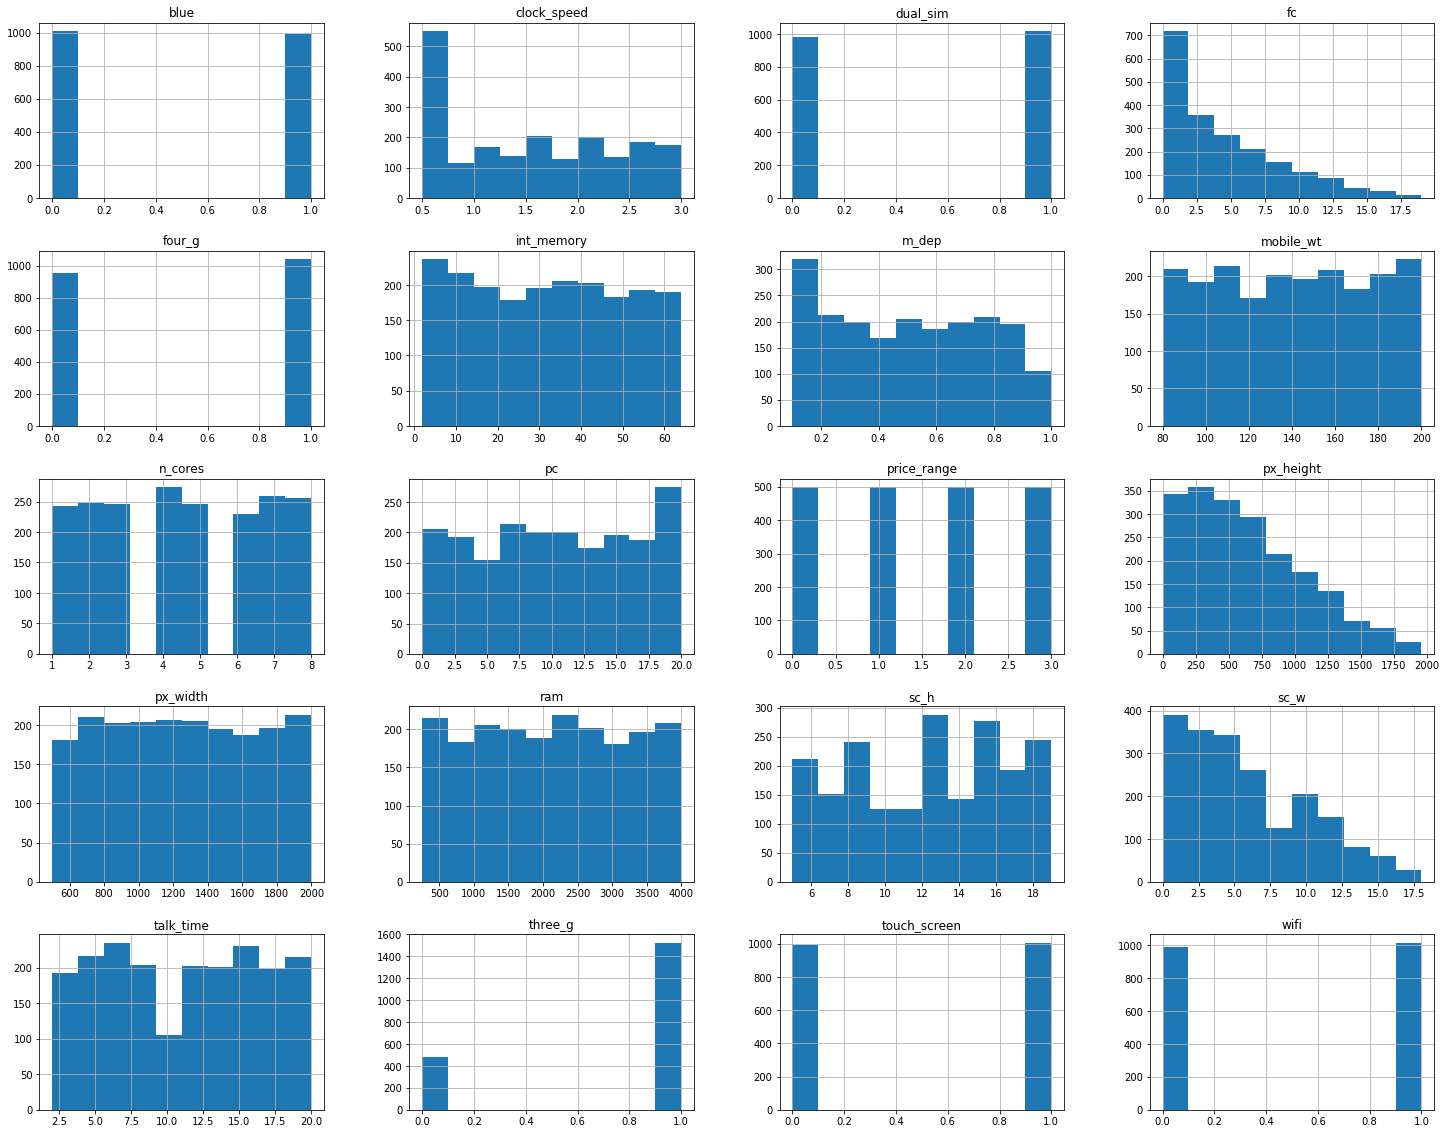

In [272]:
data.hist(figsize=(25, 20));

### Комментарий к решению
И здесь всё хорошо, правда, большинство переменных у нас тут с вами непрерывные, поэтому можно было использовать обычную корреляцию Пирсона, которая считается по умолчанию

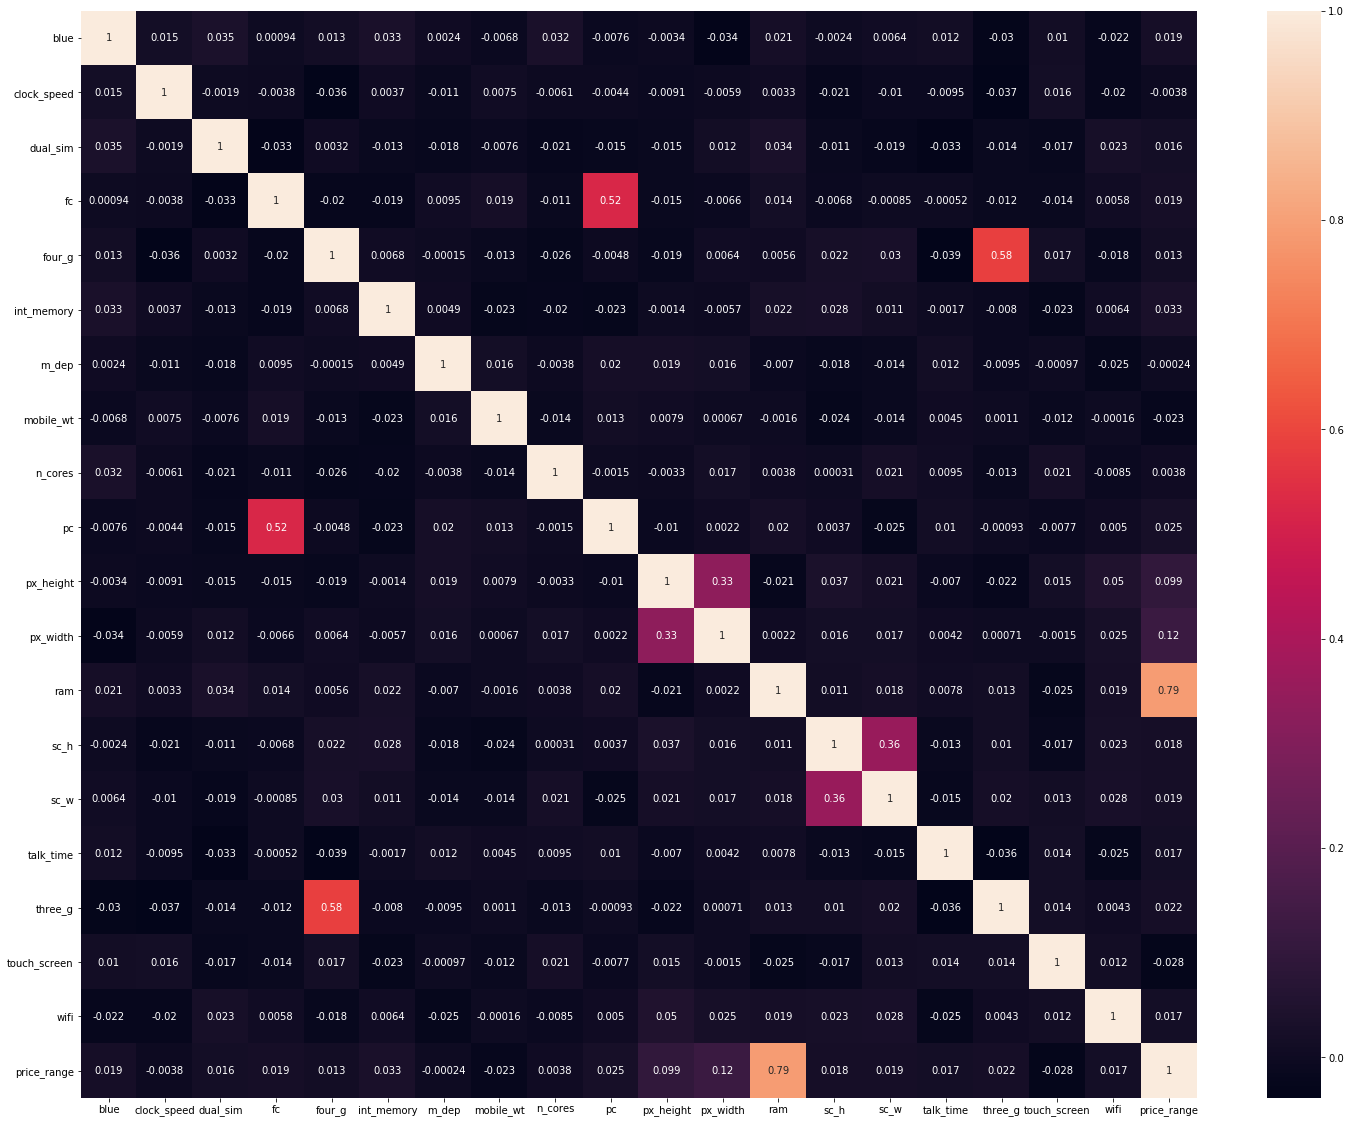

In [273]:
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr('kendall'), annot=True);

### Комментарий к решению
Визуализация интересная, похоже, данные у нас на две какие-то  группы могут быть разделены,  но вот если добавить к визуализации раскраску по нашей целевой переменной, сразу становится видно, что всё вперемешку разбросано и так просто данные не разделить :)

In [5]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
X = data.copy()
y = X.price_range
X.drop(['price_range'], axis=1, inplace=True)
X['ram'] = pd.factorize(X['ram'])[0]
X['px_height'] = pd.factorize(X['px_height'])[0]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 48 s, sys: 3.83 s, total: 51.8 s
Wall time: 54.2 s


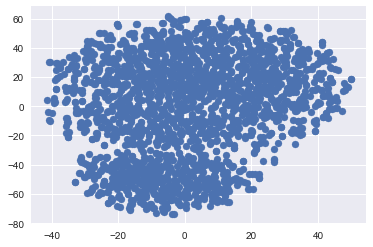

In [7]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

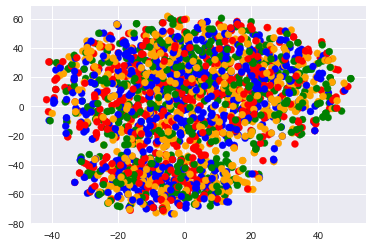

In [9]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=y.map({0: 'blue', 1: 'orange', 2: 'red', 3: 'green'}));